<a href="https://colab.research.google.com/github/diazoniclabs/Microland/blob/main/Time%20Series%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
raw_df = pd.read_html('https://raw.githubusercontent.com/diazoniclabs/Microland/main/onion_2019.html')
df = raw_df[-1]
df

In [ ]:
df.info()

In [ ]:
df = df.dropna()
df

In [ ]:
# Explore the Average value price of Onion in different cities wrt Date


# 1. Rename the column of Average Price
# 2. Consider the column Date,market and Average Price and drop other columns
# 3. Check the missing/unwanted values and drop them
# 4. Convert the columns into required datatype
# 5. Plot the Line chart for avg value price of different cities
# - Which are the different cities
# - Which city and date pricing is highest/lowest
# - Group the avg price based on city
# - Highest/Lowest Price of onion in every city

In [ ]:
df = df.rename(columns={'Modal Price (Rs/q)':'Avg'})
df

In [ ]:
df = df[['Date','Market','Avg']]
df

In [ ]:
df.info()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Avg'] = df['Avg'].astype(int)

In [ ]:
df.info()

In [51]:
u = df['Market'].unique()

array(['BANGALORE', 'CHENNAI', 'DELHI', 'KOLKATA'], dtype=object)

In [52]:
df['Market'].value_counts()

DELHI        252
BANGALORE    246
CHENNAI      240
KOLKATA      202
Name: Market, dtype: int64

In [54]:
price_max = df['Avg'].max()
price_max

14000

In [55]:
df[df['Avg'] == price_max]

,Date,Market,Avg
229,2019-12-06,BANGALORE,14000
468,2019-12-07,CHENNAI,14000


In [56]:
price_min = df['Avg'].min()
df[df['Avg'] == price_min]

,Date,Market,Avg
30,2019-02-11,BANGALORE,550


In [61]:
df.groupby('Market').mean(numeric_only=True)

,Avg
Market,
BANGALORE,2350.463415
CHENNAI,3062.083333
DELHI,1831.503968
KOLKATA,2943.673267


In [63]:
u = df['Market'].unique()
b_df = df[df['Market'] == u[0]]
c_df = df[df['Market'] == u[1]]
d_df = df[df['Market'] == u[2]]
k_df = df[df['Market'] == u[3]]

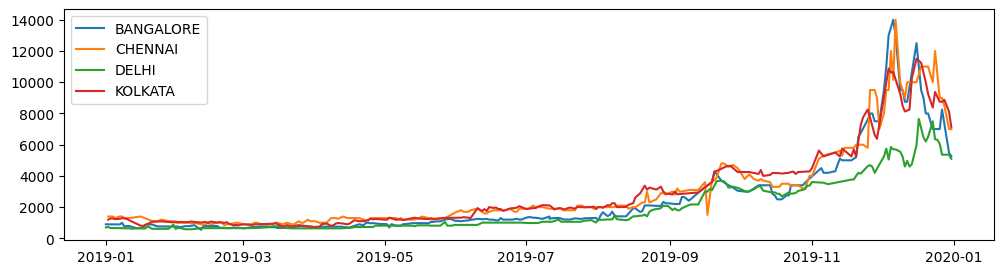

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.plot(b_df['Date'],b_df['Avg'],label=u[0])
plt.plot(c_df['Date'],c_df['Avg'],label=u[1])
plt.plot(d_df['Date'],d_df['Avg'],label=u[2])
plt.plot(k_df['Date'],k_df['Avg'],label=u[3])
plt.legend()
plt.show()

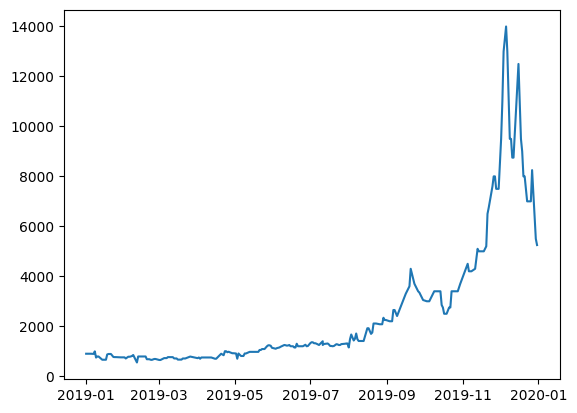

In [69]:
plt.plot(b_df['Date'],b_df['Avg'],label=u[0])

In [70]:
import prophet

In [72]:
b_df = b_df.rename(columns = {'Date':'ds','Avg':'y'})
b_df = b_df.drop(columns='Market')
b_df

,ds,y
0,2019-01-01,900
1,2019-01-02,900
2,2019-01-03,900
3,2019-01-04,900
4,2019-01-05,900
...,...,...
241,2019-12-24,7000
242,2019-12-26,7000
243,2019-12-27,8250
244,2019-12-30,5500


In [73]:
from prophet import Prophet


In [75]:
m = Prophet()
m.fit(b_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7jt7pyro/rq_gbgnb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7jt7pyro/7qajzmjv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73750', 'data', 'file=/tmp/tmp7jt7pyro/rq_gbgnb.json', 'init=/tmp/tmp7jt7pyro/7qajzmjv.json', 'output', 'file=/tmp/tmp7jt7pyro/prophet_model3lk4h37j/prophet_model-20230810131801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [76]:
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
258,2020-01-16
259,2020-01-17
260,2020-01-18
261,2020-01-19
262,2020-01-20


In [77]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
258,2020-01-16,10021.435903,8723.362669,11328.799911
259,2020-01-17,10223.194517,8926.201303,11596.381202
260,2020-01-18,10376.675286,9077.278675,11725.075954
261,2020-01-19,10486.911845,9216.315860,11702.202123
262,2020-01-20,10301.270640,9037.804076,11626.127712


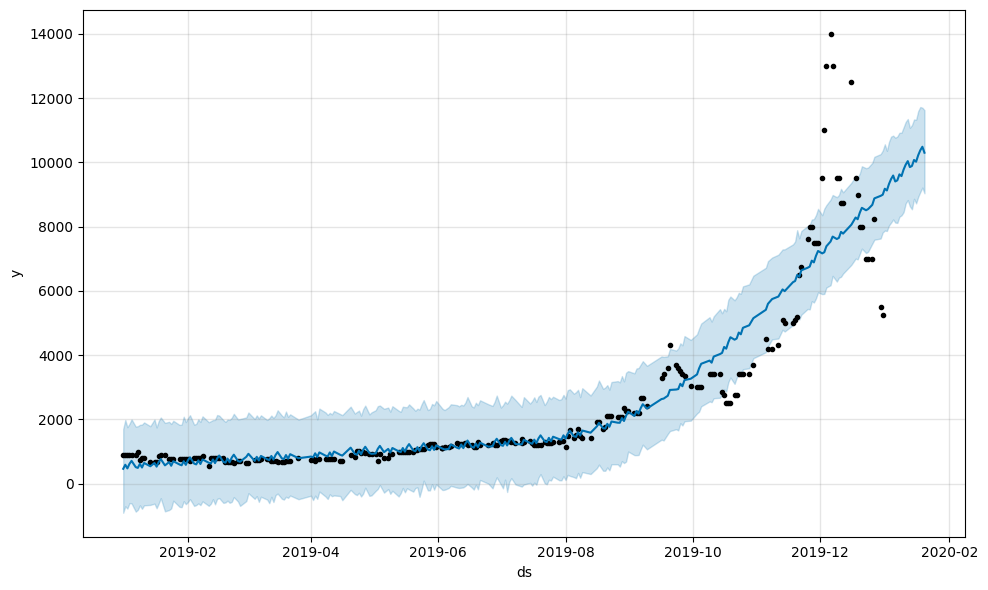

In [78]:
fig1 = m.plot(forecast)
